In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
titanic_data = pd.read_csv('tested_titanic.csv')

In [88]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**On showing info() function the Age & Cabin columns display some null values which needed to be filled**

In [89]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Titanic Datasets describe function is useful in displaying minimum and maximum Age,Sibling spouse, Parent child**

In [90]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

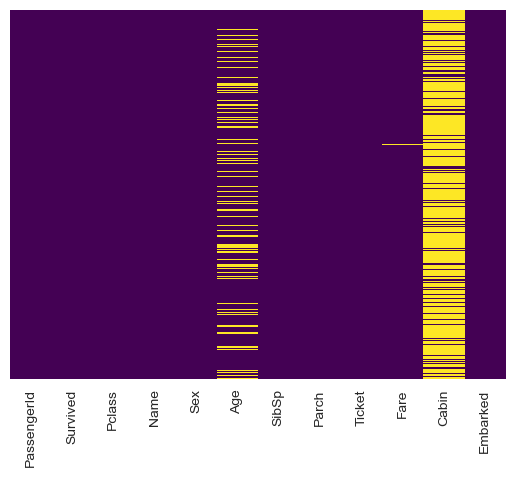

In [91]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Passenger who survived the Titanic ship drowning have 152 survivors with mostly female**

In [92]:
titanic_data[titanic_data['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


**Plotting the passenger who survived the disaster**

C:\Users\tusha\AppData\Local\Temp\ipykernel_5360\950343013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=titanic_data,palette='RdBu_r')


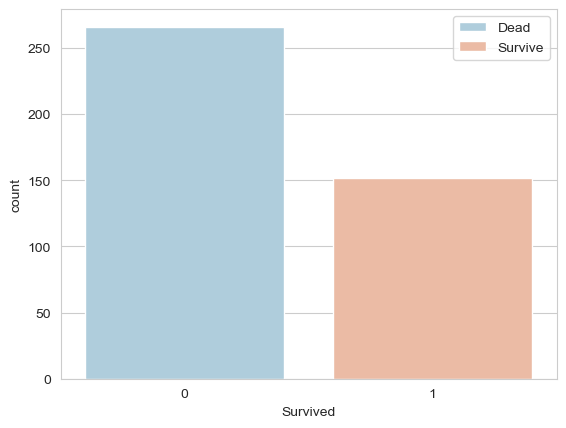

In [93]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_data,palette='RdBu_r')
plt.legend(labels=['Dead','Survive'])

**We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.**

C:\Users\tusha\AppData\Local\Temp\ipykernel_5360\4275876903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')


<Axes: title={'center': 'Age of Passengers in Different Class'}, xlabel='Pclass', ylabel='Age'>

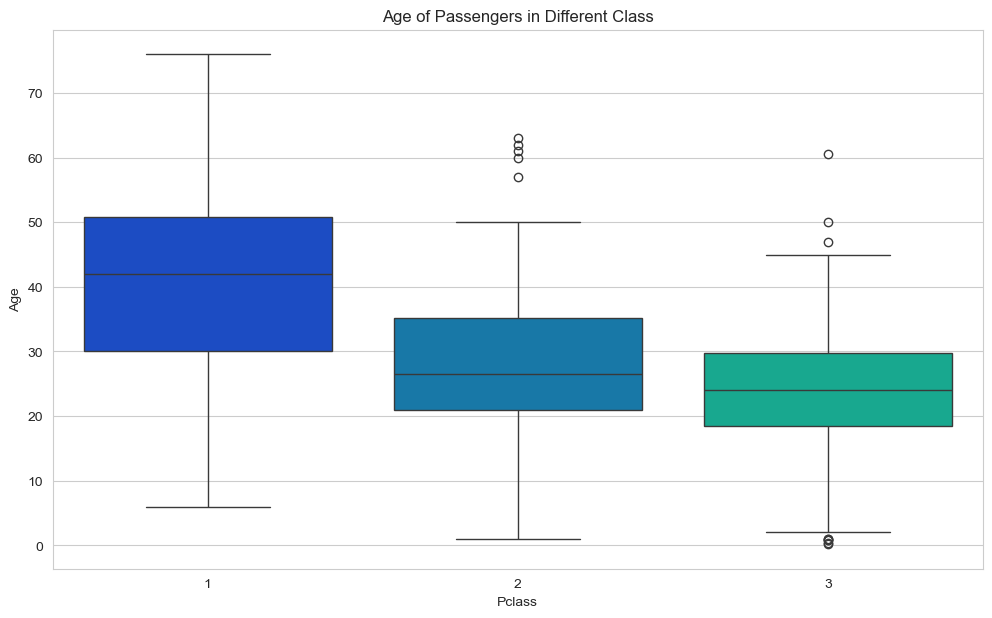

In [94]:
plt.figure(figsize=(12, 7))
plt.title('Age of Passengers in Different Class')
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

In [95]:
survived = titanic_data[titanic_data['Survived']==1]

In [96]:
survived['Pclass'].value_counts().values

array([72, 50, 30], dtype=int64)

In [97]:
# Female Survived = 152
(survived['Sex']=='female').sum() and (titanic_data['Survived']==1).sum()

152

In [98]:
# Male Survived = 0
(survived['Sex']=='male').sum() and (passengers['Survived']==1).sum()

0

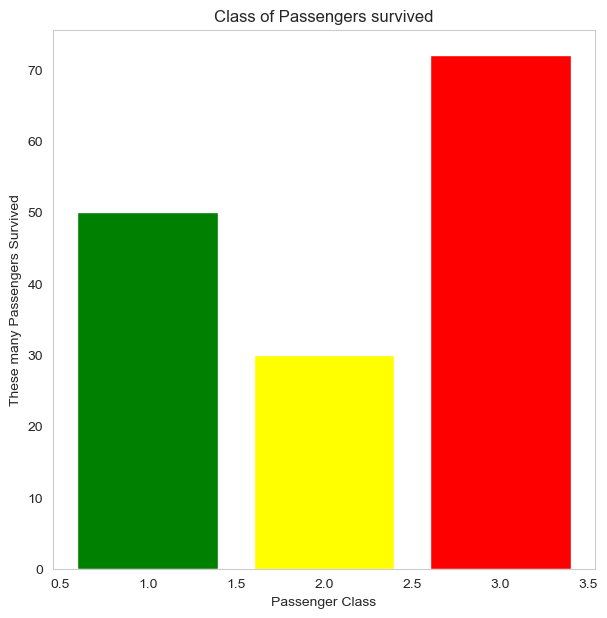

In [99]:
plt.figure(figsize=(7,7))
plt.xlabel('Passenger Class')
plt.ylabel('These many Passengers Survived')
plt.yticks()
plt.grid()
plt.title('Class of Passengers survived')
plt.bar(survived['Pclass'].value_counts().keys(),survived['Pclass'].value_counts().values,color=['red','green','yellow'])
plt.show()

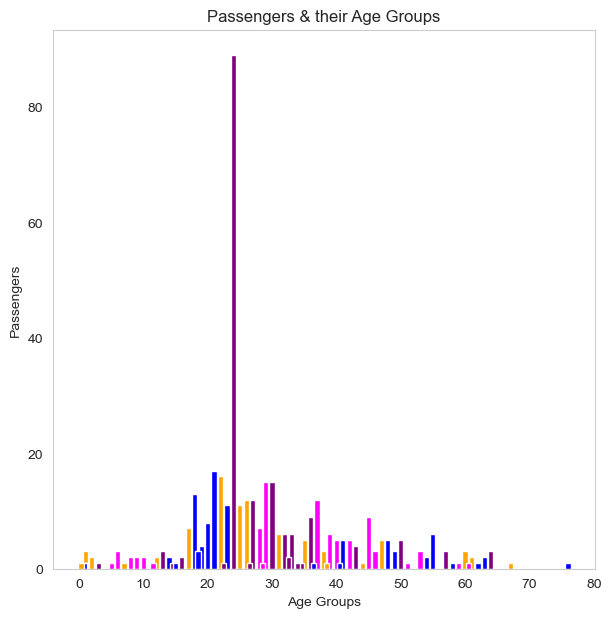

In [123]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Passengers')
plt.yticks()
plt.grid()
plt.title('Passengers & their Age Groups')
plt.bar(titanic_data['Age'].value_counts().keys(),titanic_data['Age'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

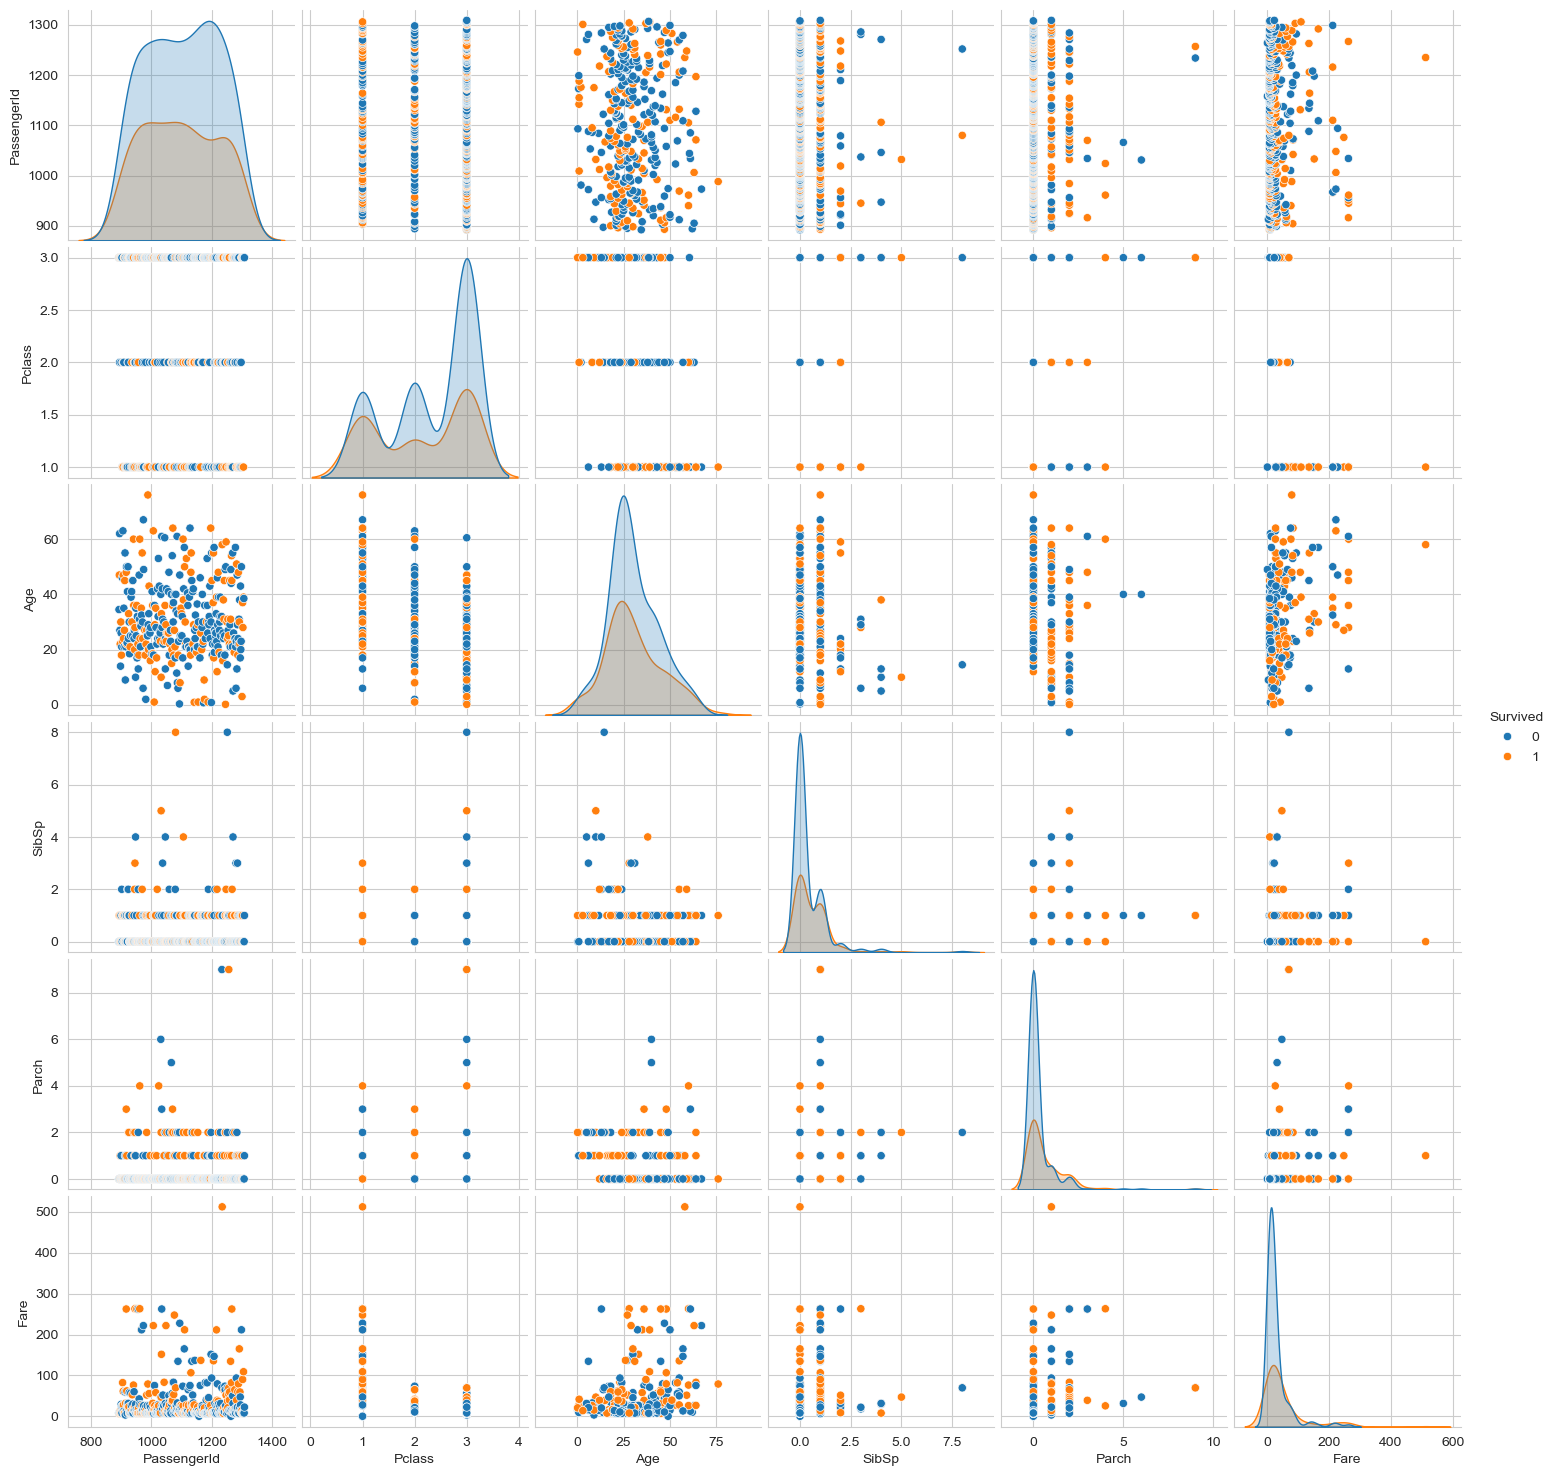

In [100]:
sns.pairplot(titanic_data,hue='Survived')

**Lineplot**

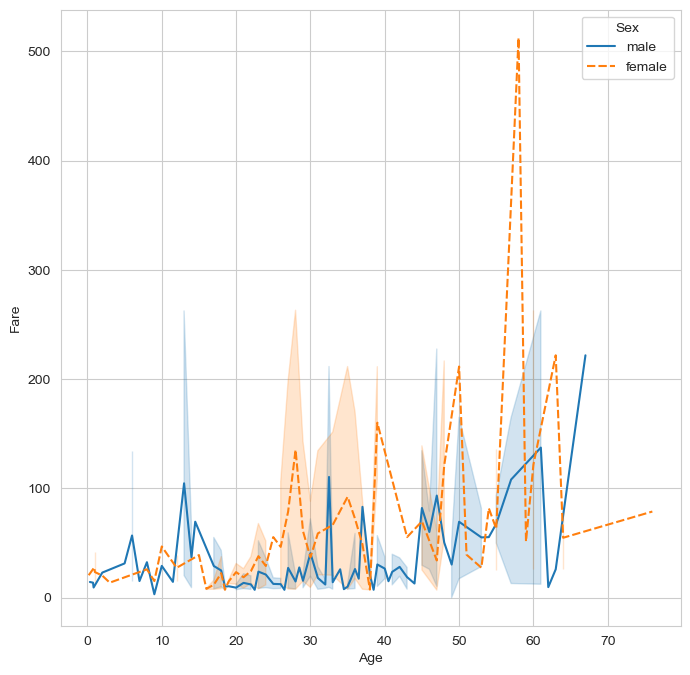

In [101]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=titanic_data)
plt.show()


In [102]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [103]:


titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\tusha\AppData\Local\Temp\ipykernel_5360\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\tusha\AppData\Local\Temp\ipykernel_5360\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

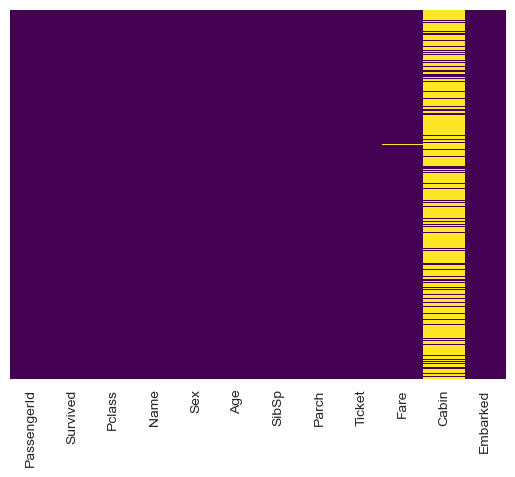

In [104]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [105]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [106]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


**In the heatmap the Pclass are negatively correlated that means it has less presence
also as the chance of surving also depends on PClass**

<Axes: >

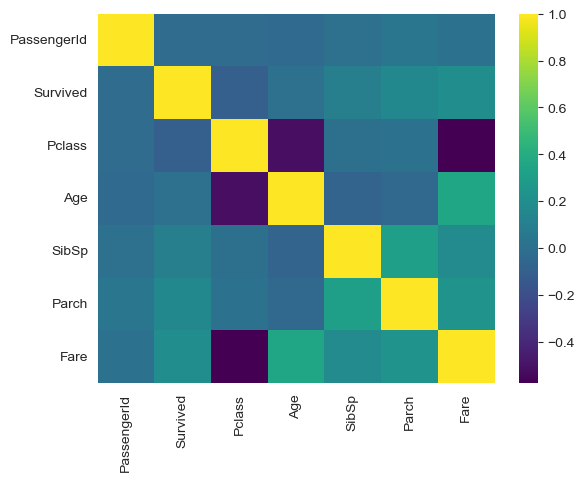

In [107]:
sns.heatmap(titanic_data.corr(numeric_only=True), cmap = 'viridis')

**Stratified Shuffle Split is used for features having high importance and try to have similiar distribution in training and testing data**

In [108]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1 ,test_size=0.2,random_state=101)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

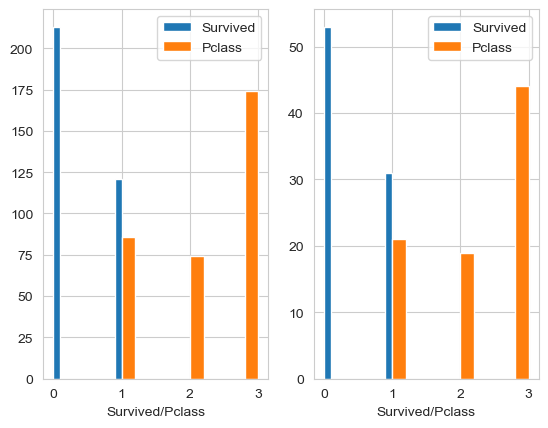

In [109]:
plt.subplot(1,2,1)
str1 = strat_train_set['Survived'].hist()
str2 = strat_train_set['Pclass'].hist()
plt.xlabel(xlabel='Survived/Pclass')
plt.legend(labels = ['Survived','Pclass'])
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.xlabel(xlabel='Survived/Pclass')
plt.legend(labels = ['Survived','Pclass'])
plt.show()

In [110]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [111]:
titanic_data.drop(columns=['Embarked'],inplace=True)

In [112]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500


In [113]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875


In [114]:
import pandas as pd

print(X_train.isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [115]:
titanic_data.drop(columns=['Ticket'],inplace=True)

In [116]:
titanic_data['Sex'] = pd.get_dummies(pd.get_dummies(titanic_data['Sex'],drop_first=True))

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [118]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop('Survived',axis=1), 
                                                    titanic_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [119]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'Franklin, Mr. Thomas Parham'

In [ ]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))